In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
tb_dir = "../data/raw/TB"
normal_dir = "../data/raw/Normal"


In [3]:
print("TB folder exists:", os.path.exists(tb_dir))
print("Normal folder exists:", os.path.exists(normal_dir))


TB folder exists: True
Normal folder exists: True


In [4]:
TARGET_IMAGE_SIZE = (224, 224)
TARGET_IMAGE_SIZE


(224, 224)

In [5]:
clahe = cv2.createCLAHE(
    clipLimit=2.0,
    tileGridSize=(8, 8)
)


In [6]:
def preprocess_image(image):
    image = cv2.resize(image, TARGET_IMAGE_SIZE)
    image = clahe.apply(image)
    image = image / 255.0
    return image


In [7]:
sample_tb_image = os.listdir(tb_dir)[0]
sample_tb_path = os.path.join(tb_dir, sample_tb_image)

raw_img = cv2.imread(sample_tb_path, cv2.IMREAD_GRAYSCALE)
raw_img.shape


(180, 221)

(np.float64(-0.5), np.float64(220.5), np.float64(179.5), np.float64(-0.5))

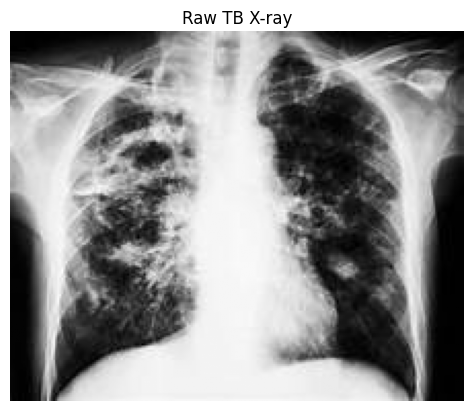

In [8]:
plt.imshow(raw_img, cmap="gray")
plt.title("Raw TB X-ray")
plt.axis("off")


In [9]:
processed_img = preprocess_image(raw_img)
processed_img.shape


(224, 224)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

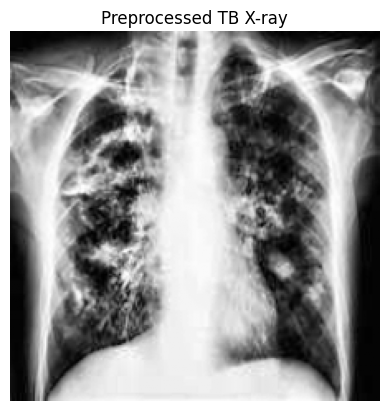

In [10]:
plt.imshow(processed_img, cmap="gray")
plt.title("Preprocessed TB X-ray")
plt.axis("off")


In [11]:
processed_img.min(), processed_img.max()


(np.float64(0.00392156862745098), np.float64(1.0))

In [12]:
processed_img.dtype


dtype('float64')

In [13]:
processed_tb_dir = "../data/processed/TB"
processed_normal_dir = "../data/processed/Normal"

os.makedirs(processed_tb_dir, exist_ok=True)
os.makedirs(processed_normal_dir, exist_ok=True)


In [14]:
def process_and_save_images(input_dir, output_dir):
    for img_name in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_name)
        
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        
        img = preprocess_image(img)
        
        save_path = os.path.join(output_dir, img_name)
        cv2.imwrite(save_path, (img * 255).astype("uint8"))


In [15]:
process_and_save_images(tb_dir, processed_tb_dir)
print("TB images processed")


TB images processed


In [16]:
process_and_save_images(normal_dir, processed_normal_dir)
print("Normal images processed")


Normal images processed


In [17]:
print("Raw TB images:", len(os.listdir(tb_dir)))
print("Processed TB images:", len(os.listdir(processed_tb_dir)))

print("Raw Normal images:", len(os.listdir(normal_dir)))
print("Processed Normal images:", len(os.listdir(processed_normal_dir)))


Raw TB images: 2
Processed TB images: 2
Raw Normal images: 1
Processed Normal images: 1


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

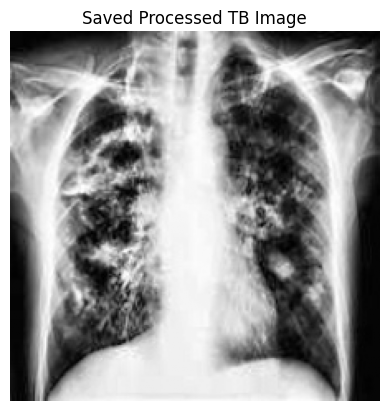

In [18]:
sample_processed = os.listdir(processed_tb_dir)[0]
img = cv2.imread(os.path.join(processed_tb_dir, sample_processed), cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Saved Processed TB Image")
plt.axis("off")


In [19]:
processed_tb_dir = "../data/processed/TB"
processed_normal_dir = "../data/processed/Normal"

os.makedirs(processed_tb_dir, exist_ok=True)
os.makedirs(processed_normal_dir, exist_ok=True)


In [20]:
def process_and_save_images(input_dir, output_dir):
    for img_name in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_name)
        
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        
        img = preprocess_image(img)
        
        save_path = os.path.join(output_dir, img_name)
        cv2.imwrite(save_path, (img * 255).astype("uint8"))


In [21]:
process_and_save_images(tb_dir, processed_tb_dir)
print("TB images processed")


TB images processed


In [22]:
process_and_save_images(normal_dir, processed_normal_dir)
print("Normal images processed")


Normal images processed


In [23]:
print("Raw TB images:", len(os.listdir(tb_dir)))
print("Processed TB images:", len(os.listdir(processed_tb_dir)))

print("Raw Normal images:", len(os.listdir(normal_dir)))
print("Processed Normal images:", len(os.listdir(processed_normal_dir)))


Raw TB images: 700
Processed TB images: 700
Raw Normal images: 3500
Processed Normal images: 3500


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

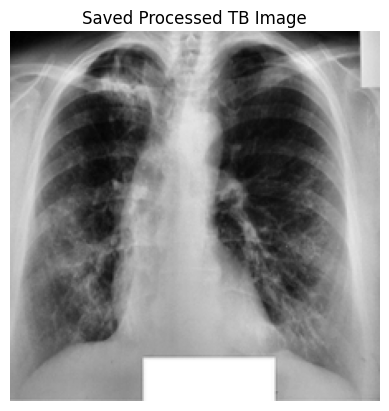

In [25]:
sample_processed = os.listdir(processed_tb_dir)[0]
img = cv2.imread(os.path.join(processed_tb_dir, sample_processed), cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Saved Processed TB Image")
plt.axis("off")


In [26]:
import os

print("Raw TB:", len(os.listdir("../data/raw/TB")))
print("Processed TB:", len(os.listdir("../data/processed/TB")))

print("Raw Normal:", len(os.listdir("../data/raw/Normal")))
print("Processed Normal:", len(os.listdir("../data/processed/Normal")))


Raw TB: 700
Processed TB: 700
Raw Normal: 3500
Processed Normal: 3500


In [27]:
os.listdir("../data/processed/TB")[:5]


['Tuberculosis-1.png',
 'Tuberculosis-10.png',
 'Tuberculosis-100.png',
 'Tuberculosis-101.png',
 'Tuberculosis-102.png']

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

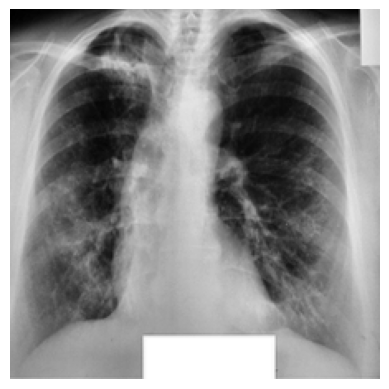

In [28]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(
    os.path.join("../data/processed/TB", os.listdir("../data/processed/TB")[0]),
    cv2.IMREAD_GRAYSCALE
)

plt.imshow(img, cmap="gray")
plt.axis("off")
